In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\교통사고정보개방시스템\사망교통사고정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\사망교통사고정보\\FatalTrafficAccidents_CodeList.xlsx',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\사망교통사고정보\\12_21_death.csv']

In [12]:
df = pd.read_csv(files[1],encoding='cp949')
df.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
1,2012,2012010101,야간,일,1,6,5,0,0,전북,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.909523,35.633956
2,2012,2012010108,주간,일,1,1,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268
3,2012,2012010110,주간,일,2,2,0,0,0,경남,...,측면충돌,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.155984,35.733503
4,2012,2012010103,야간,일,1,1,0,0,0,경북,...,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1070222,1834630,128.284180,36.506769


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39944 entries, 0 to 39943
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           39944 non-null  int64  
 1   발생년월일시        39944 non-null  int64  
 2   주야            39944 non-null  object 
 3   요일            39944 non-null  object 
 4   사망자수          39944 non-null  int64  
 5   사상자수          39944 non-null  int64  
 6   중상자수          39944 non-null  int64  
 7   경상자수          39944 non-null  int64  
 8   부상신고자수        39944 non-null  int64  
 9   발생지시도         39944 non-null  object 
 10  발생지시군구        39944 non-null  object 
 11  사고유형_대분류      39944 non-null  object 
 12  사고유형_중분류      39944 non-null  object 
 13  사고유형          39944 non-null  object 
 14  법규위반          39944 non-null  object 
 15  도로형태_대분류      39944 non-null  object 
 16  도로형태          39944 non-null  object 
 17  당사자종별_1당_대분류  39944 non-null  object 
 18  당사자종별_2당_대분류  39944 non-nu

In [8]:
df.describe()

,발생년,발생년월일시,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
count,39944.000000,3.994400e+04,39944.000000,39944.000000,39944.000000,39944.000000,39944.000000,3.994400e+04,3.994400e+04,39944.000000,39944.000000
mean,2015.954662,2.016024e+09,1.038229,1.597737,0.267925,0.260965,0.030618,1.006552e+06,1.817654e+06,127.570359,36.353081
std,2.808864,2.809082e+06,0.243002,2.004879,0.945908,1.182131,0.487470,7.800326e+04,1.182548e+05,0.864973,1.067322
min,2012.000000,2.012010e+09,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,117.992603,19.694477
25%,2013.000000,2.013123e+09,1.000000,1.000000,0.000000,0.000000,0.000000,9.459460e+05,1.719314e+06,126.897458,35.464514
50%,2016.000000,2.016033e+09,1.000000,1.000000,0.000000,0.000000,0.000000,9.761555e+05,1.821050e+06,127.233066,36.384776
75%,2018.000000,2.018100e+09,1.000000,2.000000,0.000000,0.000000,0.000000,1.076715e+06,1.930699e+06,128.350657,37.373642
max,2021.000000,2.021123e+09,10.000000,105.000000,54.000000,68.000000,67.000000,1.300152e+06,2.060065e+06,130.894139,38.537855


In [9]:
df.describe(include=np.object)

,주야,요일,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
count,39944,39944,39944,39944,39944,39944,39944,39944,39944,39944,39944,39944
unique,2,7,17,208,4,19,22,8,7,15,13,16
top,야간,금,경기,서구,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자
freq,20055,6003,7529,782,15909,9205,9205,27873,26037,23486,19371,15391


In [10]:
df.isnull().sum()

발생년             0
발생년월일시          0
주야              0
요일              0
사망자수            0
사상자수            0
중상자수            0
경상자수            0
부상신고자수          0
발생지시도           0
발생지시군구          0
사고유형_대분류        0
사고유형_중분류        0
사고유형            0
법규위반            0
도로형태_대분류        0
도로형태            0
당사자종별_1당_대분류    0
당사자종별_2당_대분류    0
발생위치X_UTMK      0
발생위치Y_UTMK      0
경도              0
위도              0
dtype: int64

In [76]:
df['발생월'] = df['발생년월일시'].apply(lambda x : int(str(x)[4:6]) )
df['발생시'] = df['발생년월일시'].apply(lambda x : int(str(x)[-2:]) )

In [77]:
def encoding_day(x):
    if x=='월':
        return 0
    elif x=='화':
        return 1
    elif x=='수':
        return 2
    elif x=='목':
        return 3
    elif x=='금':
        return 4
    elif x=='토':
        return 5
    else:
        return 6
df['요일'] = df['요일'].apply(encoding_day)

In [78]:
df.tail()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생월,발생시
39939,2021,2021112608,주간,4,1,1,0,0,0,경기,...,교차로,교차로내,승용차,보행자,960704,1898193,127.057882,37.081528,11,8
39940,2021,2021112717,주간,5,1,1,0,0,0,경기,...,단일로,기타단일로,승용차,자전거,967662,1888955,127.136562,36.998521,11,17
39941,2021,2021120711,주간,1,1,1,0,0,0,경기,...,기타,기타,화물차,화물차,948951,1885138,126.926540,36.963284,12,11
39942,2021,2021123121,야간,4,1,1,0,0,0,강원,...,단일로,기타단일로,승용차,없음,1042559,2010975,127.985386,38.097913,12,21
39943,2021,2021122601,야간,6,1,1,0,0,0,강원,...,단일로,기타단일로,화물차,없음,1008307,1965287,127.594217,37.687089,12,1


**연도별 사상자 및 비율은?**

**월별 사상자 및 비율은?**

**요일별 사상자 및 비율은?**

**사고유형,법규위반,도로형태 비율은?**

## 시각화

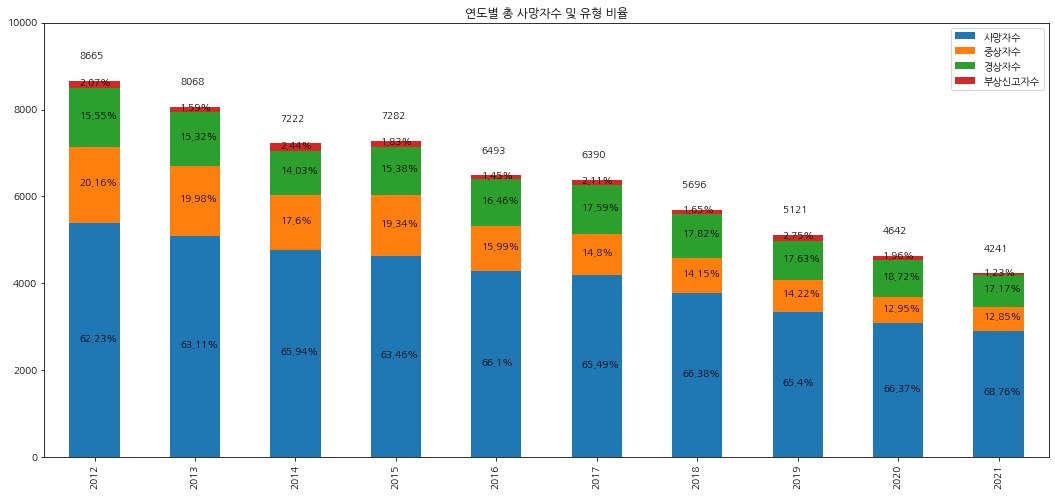

In [69]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
axes.set_ylim([0,10000])
axes.set_title('연도별 총 사망자수 및 유형 비율')
sub_df = df.groupby('발생년',as_index=False)[['사망자수','중상자수','경상자수','부상신고자수']].sum()
bars = sub_df.iloc[:,[1,2,3,4]].plot(kind='bar', stacked=True,ax=axes)
xticks = plt.xticks([i for i in range(len(sub_df))],labels=sub_df['발생년'].values)
for i in range(len(sub_df)):
    height = axes.patches[i].get_height() + axes.patches[i+10].get_height() + axes.patches[i+20].get_height() + axes.patches[i+30].get_height()
    h1 = round(axes.patches[i].get_height()/height*100,2)
    h2 = round(axes.patches[i+10].get_height()/height*100,2)
    h3 = round(axes.patches[i+20].get_height()/height*100,2)
    h4 = round(axes.patches[i+30].get_height()/height*100,2)
    height = int(height)
    ann_height = height+500
    axes.annotate(str(height),(axes.patches[i].get_x()+0.1, ann_height))
    axes.annotate(str(h1)+'%',(axes.patches[i].get_x()+0.1, 0.5*h1/100*height))
    axes.annotate(str(h2)+'%',(axes.patches[i].get_x()+0.1, (h1+0.5*h2)/100*height))
    axes.annotate(str(h3)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+0.5*h3)/100*height))
    axes.annotate(str(h4)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+h3+0.5*h4)/100*height))

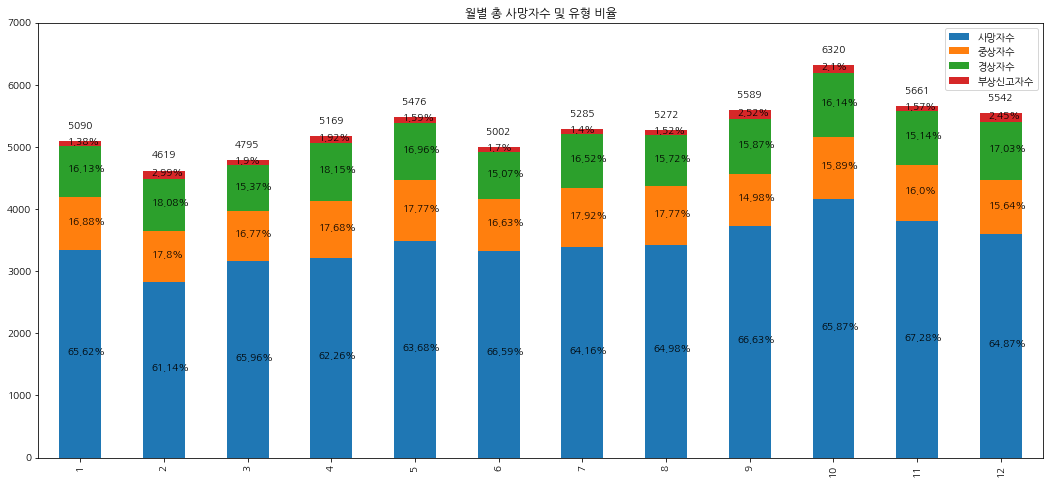

In [74]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
axes.set_ylim([0,7000])
axes.set_title('월별 총 사망자수 및 유형 비율')
sub_df = df.groupby('발생월',as_index=False)[['사망자수','중상자수','경상자수','부상신고자수']].sum()
bars = sub_df.iloc[:,[1,2,3,4]].plot(kind='bar', stacked=True,ax=axes)
xticks = plt.xticks([i for i in range(len(sub_df))],labels=sub_df['발생월'].values)
for i in range(len(sub_df)):
    height = axes.patches[i].get_height() + axes.patches[i+12].get_height() + axes.patches[i+24].get_height() + axes.patches[i+36].get_height()
    h1 = round(axes.patches[i].get_height()/height*100,2)
    h2 = round(axes.patches[i+12].get_height()/height*100,2)
    h3 = round(axes.patches[i+24].get_height()/height*100,2)
    h4 = round(axes.patches[i+36].get_height()/height*100,2)
    height = int(height)
    ann_height = height+200
    axes.annotate(str(height),(axes.patches[i].get_x()+0.1, ann_height))
    axes.annotate(str(h1)+'%',(axes.patches[i].get_x()+0.1, 0.5*h1/100*height))
    axes.annotate(str(h2)+'%',(axes.patches[i].get_x()+0.1, (h1+0.5*h2)/100*height))
    axes.annotate(str(h3)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+0.5*h3)/100*height))
    axes.annotate(str(h4)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+h3+0.5*h4)/100*height))

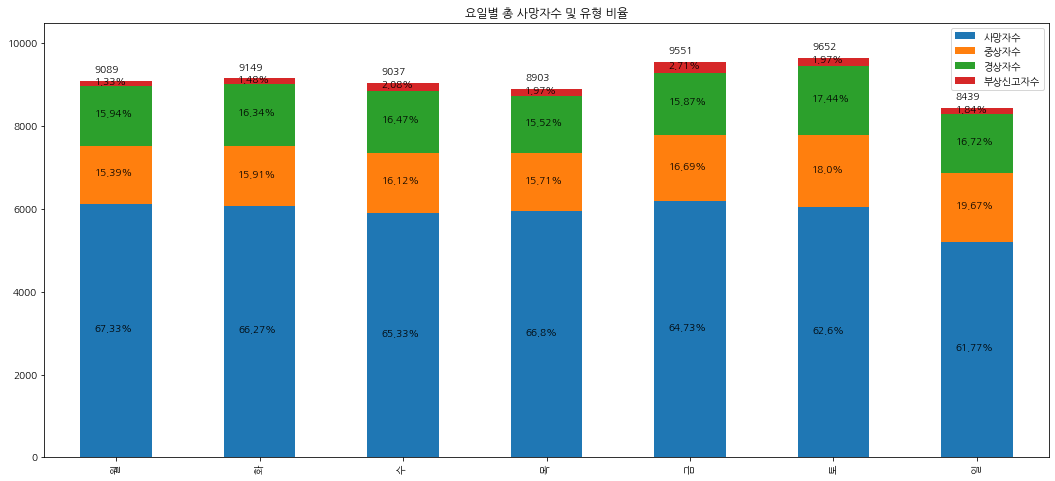

In [80]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
axes.set_ylim([0,10500])
axes.set_title('요일별 총 사망자수 및 유형 비율')
sub_df = df.groupby('요일',as_index=False)[['사망자수','중상자수','경상자수','부상신고자수']].sum().sort_values('요일')
bars = sub_df.iloc[:,[1,2,3,4]].plot(kind='bar', stacked=True,ax=axes)
xticks = plt.xticks([i for i in range(len(sub_df))],labels=['월','화','수','목','금','토','일'])
for i in range(len(sub_df)):
    height = axes.patches[i].get_height() + axes.patches[i+7].get_height() + axes.patches[i+14].get_height() + axes.patches[i+21].get_height()
    h1 = round(axes.patches[i].get_height()/height*100,2)
    h2 = round(axes.patches[i+7].get_height()/height*100,2)
    h3 = round(axes.patches[i+14].get_height()/height*100,2)
    h4 = round(axes.patches[i+21].get_height()/height*100,2)
    height = int(height)
    ann_height = height+200
    axes.annotate(str(height),(axes.patches[i].get_x()+0.1, ann_height))
    axes.annotate(str(h1)+'%',(axes.patches[i].get_x()+0.1, 0.5*h1/100*height))
    axes.annotate(str(h2)+'%',(axes.patches[i].get_x()+0.1, (h1+0.5*h2)/100*height))
    axes.annotate(str(h3)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+0.5*h3)/100*height))
    axes.annotate(str(h4)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+h3+0.5*h4)/100*height))

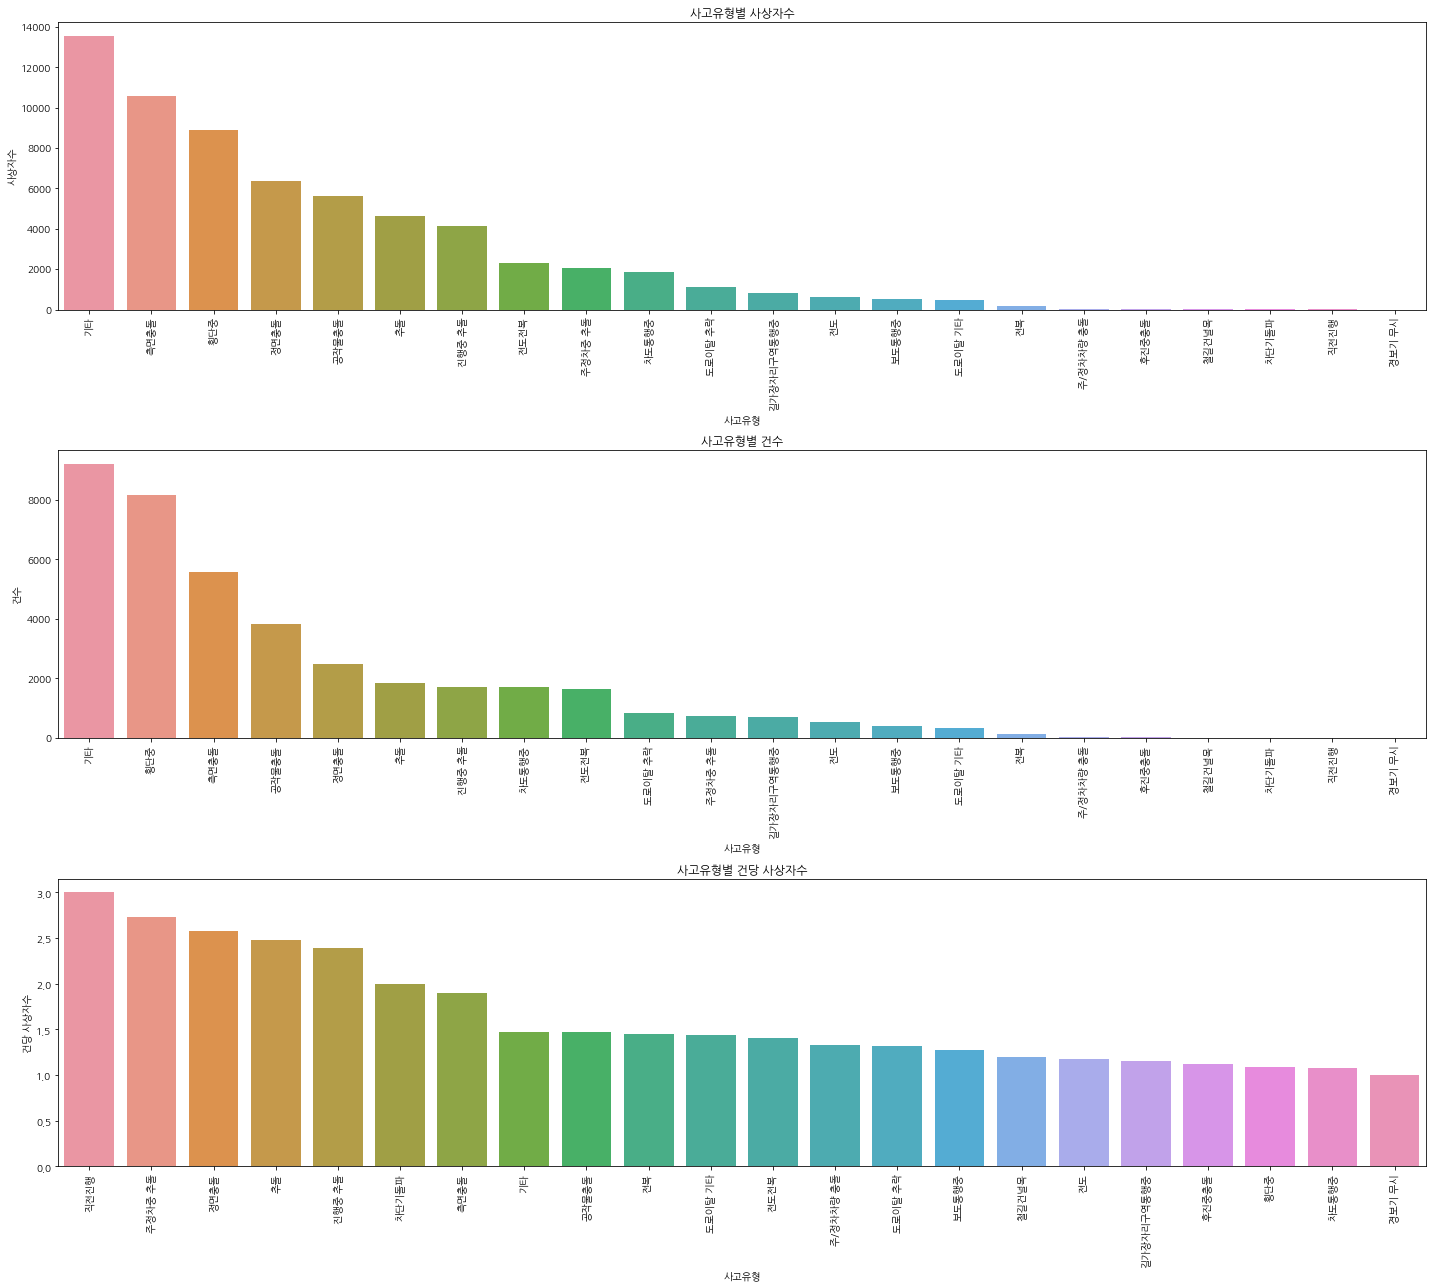

In [87]:
sub_df1 = df.groupby('사고유형',as_index=False)['사상자수'].sum().sort_values('사상자수',ascending=False)
sub_df2 = df.groupby('사고유형',as_index=False)['사상자수'].count().sort_values('사상자수',ascending=False)
sub_df2.columns = ['사고유형','건수']
sub_df3 = pd.merge(sub_df1,sub_df2,how='left',on='사고유형')
sub_df3['건당 사상자수'] = sub_df3['사상자수']/sub_df3['건수']
sub_df3 = sub_df3.sort_values('건당 사상자수',ascending=False)
fig,axes = plt.subplots(3,1,figsize=(20,18))
sns.barplot(data=sub_df1,x='사고유형',y='사상자수',ax=axes[0]).set(title='사고유형별 사상자수')
sns.barplot(data=sub_df2,x='사고유형',y='건수',ax=axes[1]).set(title='사고유형별 건수')
sns.barplot(data=sub_df3,x='사고유형',y='건당 사상자수',ax=axes[2]).set(title='사고유형별 건당 사상자수')
for i in range(3):
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
plt.tight_layout()

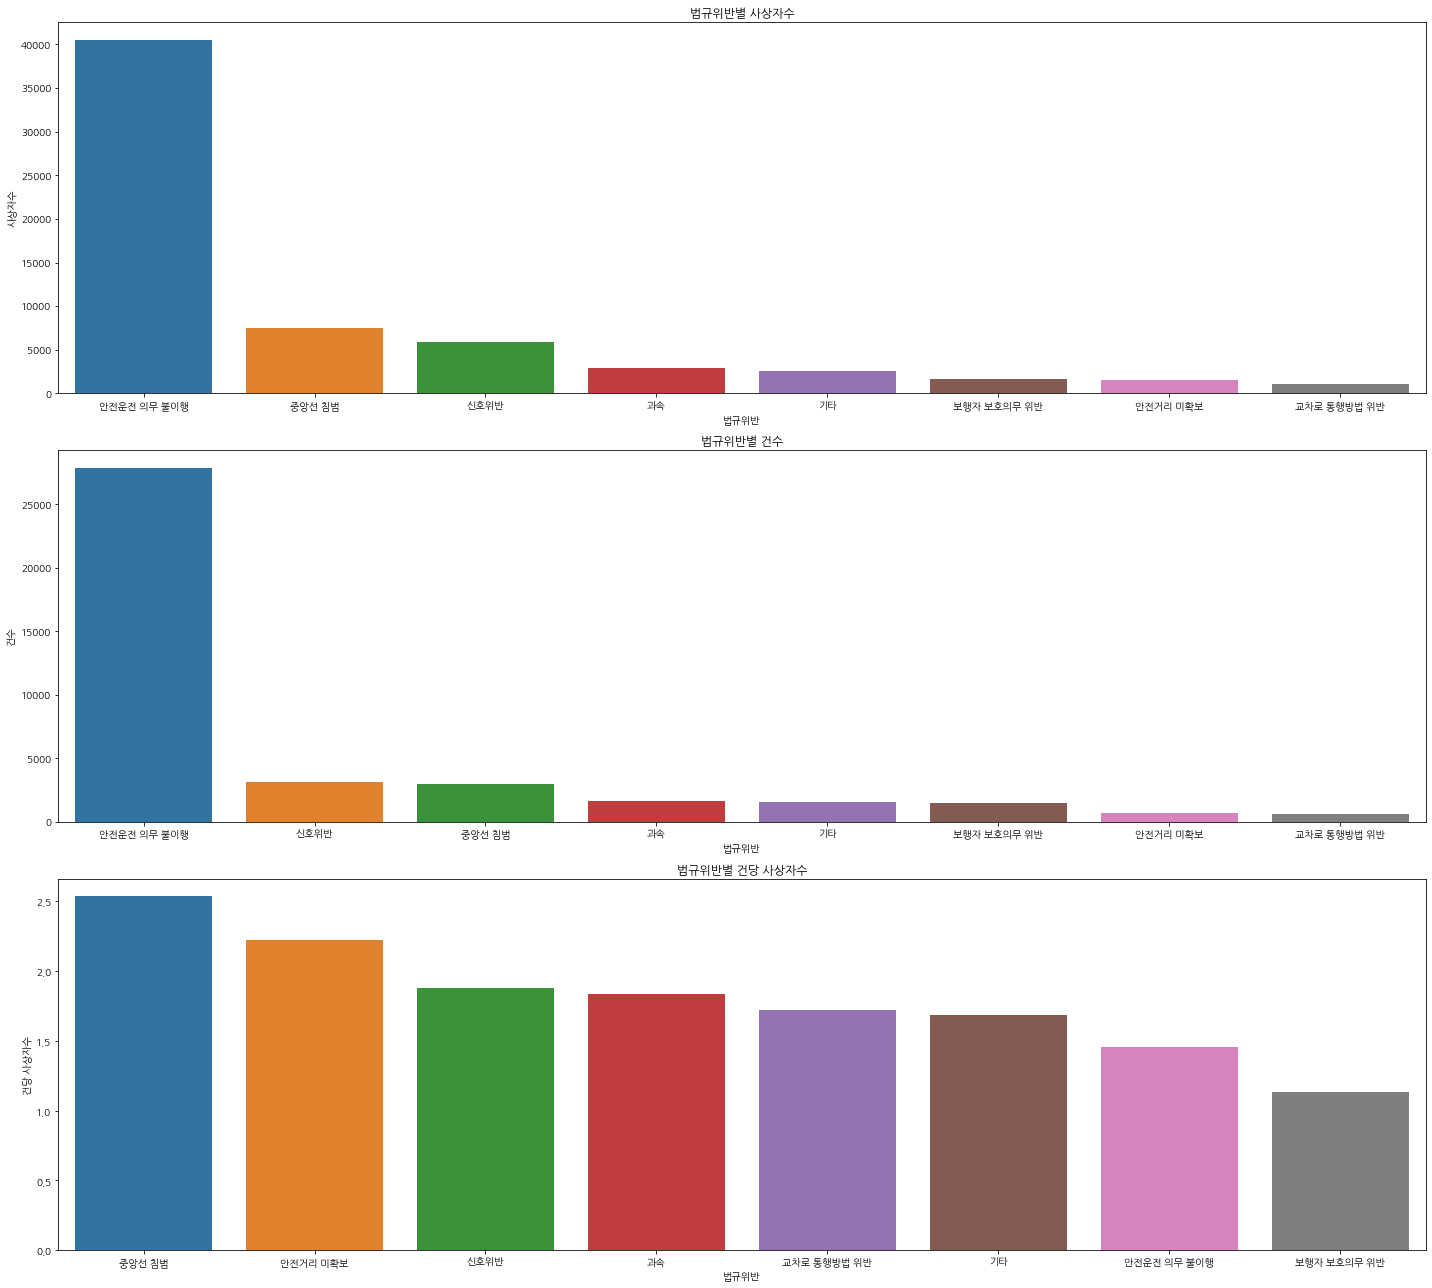

In [89]:
sub_df1 = df.groupby('법규위반',as_index=False)['사상자수'].sum().sort_values('사상자수',ascending=False)
sub_df2 = df.groupby('법규위반',as_index=False)['사상자수'].count().sort_values('사상자수',ascending=False)
sub_df2.columns = ['법규위반','건수']
sub_df3 = pd.merge(sub_df1,sub_df2,how='left',on='법규위반')
sub_df3['건당 사상자수'] = sub_df3['사상자수']/sub_df3['건수']
sub_df3 = sub_df3.sort_values('건당 사상자수',ascending=False)
fig,axes = plt.subplots(3,1,figsize=(20,18))
sns.barplot(data=sub_df1,x='법규위반',y='사상자수',ax=axes[0]).set(title='법규위반별 사상자수')
sns.barplot(data=sub_df2,x='법규위반',y='건수',ax=axes[1]).set(title='법규위반별 건수')
sns.barplot(data=sub_df3,x='법규위반',y='건당 사상자수',ax=axes[2]).set(title='법규위반별 건당 사상자수')
plt.tight_layout()

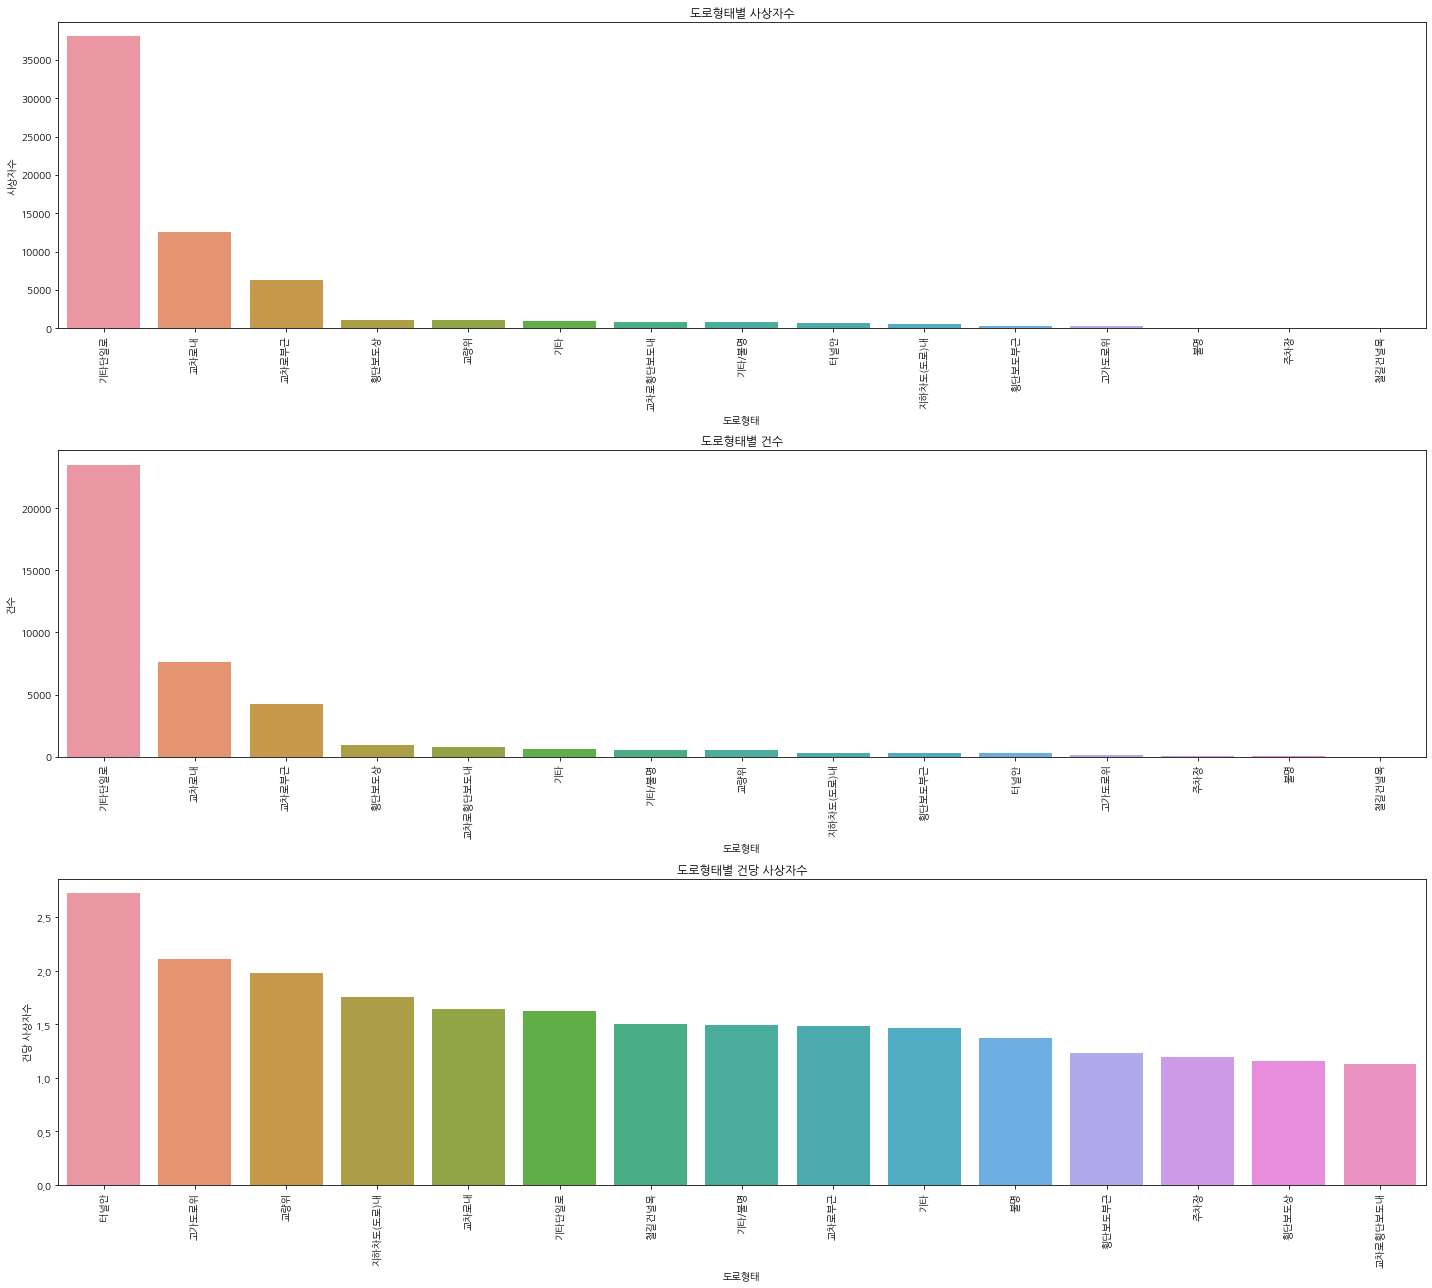

In [90]:
sub_df1 = df.groupby('도로형태',as_index=False)['사상자수'].sum().sort_values('사상자수',ascending=False)
sub_df2 = df.groupby('도로형태',as_index=False)['사상자수'].count().sort_values('사상자수',ascending=False)
sub_df2.columns = ['도로형태','건수']
sub_df3 = pd.merge(sub_df1,sub_df2,how='left',on='도로형태')
sub_df3['건당 사상자수'] = sub_df3['사상자수']/sub_df3['건수']
sub_df3 = sub_df3.sort_values('건당 사상자수',ascending=False)
fig,axes = plt.subplots(3,1,figsize=(20,18))
sns.barplot(data=sub_df1,x='도로형태',y='사상자수',ax=axes[0]).set(title='도로형태별 사상자수')
sns.barplot(data=sub_df2,x='도로형태',y='건수',ax=axes[1]).set(title='도로형태별 건수')
sns.barplot(data=sub_df3,x='도로형태',y='건당 사상자수',ax=axes[2]).set(title='도로형태별 건당 사상자수')
for i in range(3):
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
plt.tight_layout()